In [1]:
from pathlib import Path

import numpy as np
import pandas as pd


pd.set_option("display.max_columns", 100)

from google.colab import drive
drive.mount('/content/gdrive')
DATA_PATH = "/content/gdrive/My Drive/MLdata/"

train_df = pd.read_csv(
    DATA_PATH + "train.csv", 
    index_col="tripid"
)
test_df = pd.read_csv(
    DATA_PATH + "test.csv", 
    index_col="tripid"
)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
train_df["label"] = train_df["label"].map({"incorrect": 0, "correct":1})

In [3]:
train_df["pickup"] = pd.to_datetime(train_df["pickup_time"])
train_df["drop"] = pd.to_datetime(train_df["drop_time"])
train_df ['difference'] = train_df["drop"] - train_df["pickup"]
train_df ['difference'] = train_df ['difference']/np.timedelta64(1,'s')
train_df['duration'] = train_df['duration'].fillna(train_df ['difference'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   additional_fare            16974 non-null  float64       
 1   duration                   17176 non-null  float64       
 2   meter_waiting              16974 non-null  float64       
 3   meter_waiting_fare         16974 non-null  float64       
 4   meter_waiting_till_pickup  16974 non-null  float64       
 5   pickup_time                17176 non-null  object        
 6   drop_time                  17176 non-null  object        
 7   pick_lat                   17176 non-null  float64       
 8   pick_lon                   17176 non-null  float64       
 9   drop_lat                   17176 non-null  float64       
 10  drop_lon                   17176 non-null  float64       
 11  fare                       17039 non-null  float64     

In [4]:
train_df.head()

# new_df = train_df["pickup_time"]-train_df["drop_time"]
# train_df.info()
# train_df.head()
train_df.isnull().sum()
train_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pickup,drop,difference
tripid,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1,2019-11-01 00:20:00,2019-11-01 00:34:00,840.0
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1,2019-11-01 00:56:00,2019-11-01 01:09:00,780.0
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1,2019-11-01 01:08:00,2019-11-01 01:26:00,1080.0
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1,2019-11-01 02:27:00,2019-11-01 02:37:00,600.0
189128020,NaN,1020.0,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1,2019-11-01 03:34:00,2019-11-01 03:51:00,1020.0


In [5]:
train_df2 = train_df.drop(['pickup_time','drop_time','pickup','drop','difference'],axis='columns')
train_df2.isnull().sum()

additional_fare              202
duration                       0
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [6]:
#train_df2['fare'] = train_df2['fare'] .fillna(train_df2.fare.mean())
train_df2['additional_fare'] = train_df2['additional_fare'].fillna(train_df2.additional_fare.mean())
train_df2['meter_waiting'] = train_df2['meter_waiting'].fillna(train_df2.meter_waiting.mean())
train_df2['meter_waiting_fare'] = train_df2['meter_waiting_fare'].fillna(train_df2.meter_waiting_fare.mean())
train_df2['meter_waiting_till_pickup'] = train_df2['meter_waiting_till_pickup'].fillna(train_df2.meter_waiting_till_pickup.mean())
train_df2.isnull().sum()


additional_fare                0
duration                       0
meter_waiting                  0
meter_waiting_fare             0
meter_waiting_till_pickup      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [8]:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # 6371 is Radius of earth in kilometers. Use 3956 for miles
    return km

train_df2['distance'] = haversine_np(train_df2['pick_lat'], train_df2['pick_lon'], train_df2['drop_lat'] , train_df2['drop_lon'])

In [9]:
clean_df = train_df2.drop(['pick_lat','pick_lon','drop_lat','drop_lon'],axis='columns')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.05, 'Correlation of Features')

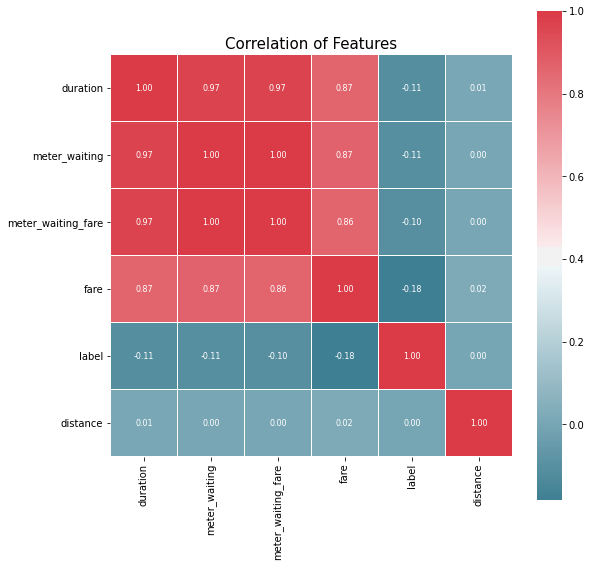

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = clean_df.iloc[:,1:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(9,9))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Features', y=1.05, size=15)

In [10]:

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17039 entries, 189123628 to 213817296
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            17039 non-null  float64
 1   duration                   17039 non-null  float64
 2   meter_waiting              17039 non-null  float64
 3   meter_waiting_fare         17039 non-null  float64
 4   meter_waiting_till_pickup  17039 non-null  float64
 5   fare                       17039 non-null  float64
 6   label                      17039 non-null  int64  
 7   distance                   17039 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [11]:
clean_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,distance
tripid,,,,,,,,
189123628,10.500000,834.0,56.000000,0.000000,64.000000,270.32,1,2.467063
189125358,10.500000,791.0,47.000000,0.000000,134.000000,197.85,1,0.868942
189125719,10.500000,1087.0,80.000000,0.000000,61.000000,301.64,1,5.531798
189127273,10.500000,598.0,271.000000,15.663800,68.000000,82.30,1,0.845795
189128020,13.719651,1020.0,629.074231,32.057666,112.466832,358.39,1,7.527884


In [12]:

clean_df.isnull().sum()

additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
fare                         0
label                        0
distance                     0
dtype: int64

In [13]:
clean_df = clean_df.drop(['meter_waiting_till_pickup'],axis='columns')

**Training**

In [17]:

X_train = clean_df.drop(['label'],axis='columns')
Y_train = clean_df['label']
Y_train.head()

tripid
189123628    1
189125358    1
189125719    1
189127273    1
189128020    1
Name: label, dtype: int64

In [ ]:
classifiers = []
model =  XGBClassifier(learning_rate =0.1, n_estimators=570, max_depth=4,
 min_child_weight=6, gamma=0.2, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,reg_alpha=0.08)
classifiers.append(model)


c_results = []
c_roc=[]
for classifier in classifiers : 
    c_results.append(cross_val_score(classifier,X_train, y = Y_train, scoring = 'f1', cv = kfold, n_jobs=4)) 
   
    
c_means = []
c_std = []
for c_result in c_results:
    c_means.append(c_result.mean())
    c_std.append(c_result.std())
    
c_res = pd.DataFrame({"CrossValMeans":c_means,"CrossValerrors": c_std,"Algorithm":["xgcboot"]}) 
c_res

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_features = clean_df.select_dtypes(include=['int64', 'float64']).drop(['label'], axis=1).columns
categorical_features = clean_df.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
classifier= XGBClassifier( learning_rate =0.1, n_estimators=570, max_depth=4,
 min_child_weight=6, gamma=0.2, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,reg_alpha=0.08,)

#classifier=RandomForestClassifier(n_estimators=500,min_samples_split= 3,bootstrap=True)
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25)

In [ ]:

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.766858552631579

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred=np.round(rf.predict(x_test),2)
lm_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
lm_train_rmse=np.sqrt(mean_squared_error(rf.predict(x_train), y_train))
lm_variance=abs(lm_train_rmse - lm_rmse)
print("Test RMSE for Linear Regression is ",lm_rmse)
print("Train RMSE for Linear Regression is ",lm_train_rmse)
print("Variance for Linear Regression is ",lm_variance)

Test RMSE for Linear Regression is  0.23487085653359868
Train RMSE for Linear Regression is  0.20422794597356625
Variance for Linear Regression is  0.030642910560032433


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='weighted')

0.9425595433063497

In [ ]:
rf.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                               

**Predicting**

In [ ]:
test_df.isnull().sum()

additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
distance                     0
dtype: int64

In [ ]:
test_df.info()
test_df.head()
test_df.isnull().sum()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            8576 non-null   float64
 1   duration                   8576 non-null   int64  
 2   meter_waiting              8576 non-null   int64  
 3   meter_waiting_fare         8576 non-null   float64
 4   meter_waiting_till_pickup  8576 non-null   int64  
 5   pickup_time                8576 non-null   object 
 6   drop_time                  8576 non-null   object 
 7   pick_lat                   8576 non-null   float64
 8   pick_lon                   8576 non-null   float64
 9   drop_lat                   8576 non-null   float64
 10  drop_lon                   8576 non-null   float64
 11  fare                       8576 non-null   float64
 12  distance                   8576 non-null   float64
dtypes: float64(8), int64(3), object(2)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,distance
tripid,,,,,,,,,,,,,
213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27,1.536052
213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70,12.990640
213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00,5.690729
213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32,0.585046
213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47,2.408311


In [ ]:
test_df['distance'] = haversine_np(test_df['pick_lat'], test_df['pick_lon'], test_df['drop_lat'] , test_df['drop_lon'])

In [ ]:
test_df2 = test_df.drop(['pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'],axis='columns')

test_df2.isnull().sum()

additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
fare                         0
distance                     0
dtype: int64

In [ ]:
test_df2 = test_df2.drop(['meter_waiting_till_pickup'],axis='columns')

In [ ]:
result = rf.predict(test_df2)
test_df2['prediction'] = result

In [ ]:
result

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
final_df = test_df2.drop(['additional_fare','meter_waiting_till_pickup','distance','duration','fare','meter_waiting','meter_waiting_fare'],axis='columns')

final_df.head()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  8576 non-null   int64
dtypes: int64(1)
memory usage: 134.0 KB


In [ ]:
final_df

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
...,...
222856243,1
222857785,1
222858416,1


In [ ]:
final_df.to_csv(DATA_PATH+'submission_36.csv', index=True)

**XGBoost Parameter Tuning**


Tune n-estimators

Best: -0.160028 using {'n_estimators': 730}
-0.160404 (0.009453) with: {'n_estimators': 550}
-0.160198 (0.009548) with: {'n_estimators': 570}
-0.160261 (0.009554) with: {'n_estimators': 590}
-0.160156 (0.009537) with: {'n_estimators': 610}
-0.160305 (0.009668) with: {'n_estimators': 630}
-0.160072 (0.009480) with: {'n_estimators': 650}
-0.160128 (0.009558) with: {'n_estimators': 670}
-0.160165 (0.009447) with: {'n_estimators': 690}
-0.160218 (0.009436) with: {'n_estimators': 710}
-0.160028 (0.009260) with: {'n_estimators': 730}


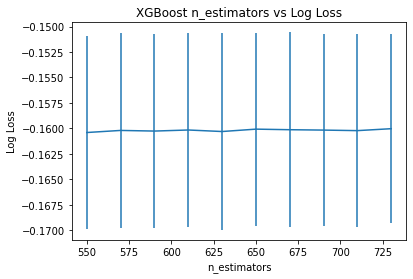

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
model = XGBClassifier(learning_rate =0.1, max_depth=3,
 min_child_weight=6, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,reg_alpha=1)
from sklearn.model_selection import StratifiedKFold
n_estimators = range(550, 750, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
 
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

Tune max_depth and min_child_weight

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=730, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([15.69676008, 15.42734332, 15.63981938, 27.29299316, 23.35507011,
         22.83033118, 32.23555918, 31.40130482, 30.74664626, 40.07135882,
         38.32539339, 33.54224024]),
  'mean_score_time': array([0.20694051, 0.18015466, 0.19815989, 0.29735298, 0.28796158,
         0.33725939, 0.47614241, 0.50938625, 0.41690454, 0.62775846,
         0.55132861, 0.407335  ]),
  'mean_test_score': array([0.90509161, 0.90421107, 0.90562284, 0.89925422, 0.90146144,
         0.90211746, 0.89953576, 0.89751404, 0.89920449, 0.90154885,
         0.898628  , 0.89847138]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, Fa

In [ ]:
param_test2 = {
 'max_depth':[6,7,8],
 'min_child_weight':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=650, max_depth=5,
 min_child_weight=2, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,Y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

Tune gamma

In [23]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=730, max_depth=3,
 min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([15.46846118, 15.56514482, 15.42488065, 15.47284613, 13.35744076]),
  'mean_score_time': array([0.20203552, 0.21752992, 0.17206745, 0.20744143, 0.13725777]),
  'mean_test_score': array([0.90562284, 0.90406912, 0.90603811, 0.90588716, 0.90597819]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([4, 5, 1, 3, 2], dtype=int32),
  'split0_test_score': array([0.92584934, 0.92106077, 0.92361875, 0.92284075, 0.92382134]),
  'split1_test_score': array([0.89811987, 0.89888428, 0.90182447, 0.89940591, 0.90080421]),
  'split2_test_score': array([0.90922795, 0.90907705, 0.91079229, 0.910302  , 0.90926293]),
  'split3_test_score': array([0.89418029, 0.89223165, 0.89586473, 0.89757788, 0.89657745]),
  'split4_test_score':

Tune alpha

In [24]:
param_test6 = {
 'reg_alpha':[ 0.05,0.5,0.6,0.7,0.8,0.9,1]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=690, max_depth=3,
 min_child_weight=6, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,Y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([14.68280425, 14.67845364, 14.71413984, 14.727178  , 14.80330148,
         14.97177653, 12.61565104]),
  'mean_score_time': array([0.17933955, 0.19308448, 0.17041941, 0.19725437, 0.1710536 ,
         0.17247725, 0.13832798]),
  'mean_test_score': array([0.90563801, 0.90665204, 0.90663323, 0.9056914 , 0.90776608,
         0.90869759, 0.90667974]),
  'param_reg_alpha': masked_array(data=[0.05, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.05},
   {'reg_alpha': 0.5},
   {'reg_alpha': 0.6},
   {'reg_alpha': 0.7},
   {'reg_alpha': 0.8},
   {'reg_alpha': 0.9},
   {'reg_alpha': 1}],
  'rank_test_score': array([7, 4, 5, 6, 2, 1, 3], dtype=int32),
  'split0_test_score': array([0.92099498, 0.92330337, 0.92379001, 0.92286321, 0.92377643,
         0.92504733, 0.92255462]),
  'split1_test_score': array([0.89757997, 0.9032447 , 0.89973381, 

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,12)],
 'colsample_bytree':[i/10.0 for i in range(6,12)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(  learning_rate =0.1, n_estimators=690, max_depth=3,
 min_child_weight=6, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 

 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, Y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_